<a href="https://colab.research.google.com/github/AnujM09/Hotel_Booking_Analysis_EDA/blob/main/Hotel_Booking_Analysis_Capstone_Project(Anuj_Menaria).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [5]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Importing all important python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',None) # To Display all the columns present in the Data Frame

In [7]:
# Reading the csv Data Frame
df = pd.read_csv('/content/drive/MyDrive/EDA_For_Data_Science/Hotel Booking Analysis/Hotel Bookings.csv') 

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Looking at the top data 
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
df.shape # Checking the shape of Data Frame

(119390, 32)

In [11]:
df.info() # To check the Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **Data Preprocessing** : 
It is an important step to perfrom in EDA.

In [13]:
# To view all Column names
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# *Step1 :*
Drop Duplicates if

In [14]:
# To check if there are any duplicate rows
df.duplicated().sum()

31994

In [15]:
# dropping all the duplicate rows
df.drop_duplicates(inplace = True)

In [16]:
df.shape

(87396, 32)

# *Step 2 :* 
Handling Missing Values

In [17]:
# Checking null values in Data Frame
df.isnull().sum().sort_values(ascending = False)[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

Since, company and agent columns have company number and agent numbers as data. There may be some cases when customer didn't book hotel via any agent or via any company. So in that case values can be null under these columns. We will remove those rows, if required otherwise impute by most frequent or by mean values.

In [18]:
df.isnull().mean().sort_values(ascending = False)[:5]*100

company               93.982562
agent                 13.951439
country                0.517186
children               0.004577
reserved_room_type     0.000000
dtype: float64

Since, In company column 93.98% data is missing. We will remove that column and in other columns we will impute values.

In [19]:
df.drop(['company'], inplace = True, axis = 1) # Removed the comapny column

Skewness of agent column is 0.8904040570601741


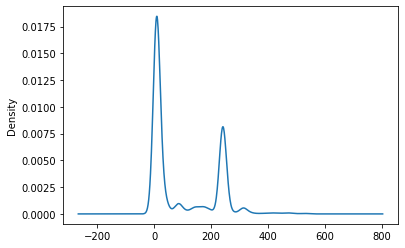

In [20]:
df['agent'].plot(kind = 'kde')
skew = df['agent'].skew()
print(f'Skewness of agent column is {skew}')

In [21]:
mean = round(df['agent'].mean(),2)  # Mean value of agent
median = df['agent'].median()       # Median Value of agent
median = df['agent'].median()
print(f"Mean is {mean}, Median is {median}")

Mean is 94.14, Median is 14.0


In [22]:
df['agent_mean'] = df['agent'].fillna(mean)      # Inputting mean value
df['agent_median'] = df['agent'].fillna(median)  # Inputting mean value

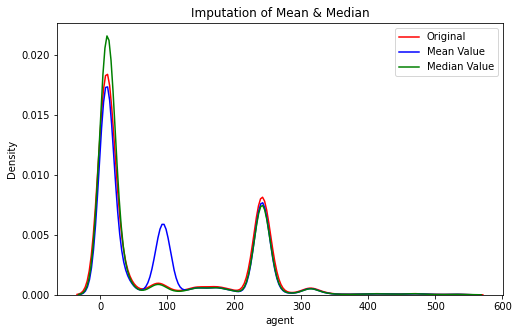

In [23]:
plt.figure(figsize = (8,5))                                             # Changing the size of the figure on the x & y scale 
plt.title('Imputation of Mean & Median')                                # Giving the title to the graph 
sns.kdeplot(df['agent'],label = 'Original', color = 'r')                # Drawing a KDE plot graph
sns.kdeplot(df['agent_mean'],label = 'Mean Value', color = 'b')
sns.kdeplot(df['agent_median'],label = 'Median Value', color = 'g')
plt.legend()
plt.show()

From KDE graph we can evaluate that median value is good for null values is in agent column.

In [24]:
df.drop (['agent', 'agent_mean'],axis=1,inplace = True) # Dropping unwanted columns 

In [25]:
 c_m = df['country'].mode()[0]
df['country'] = df['country'].fillna(c_m)    # Imputing  most frequent values in country

In [26]:
child_mean=round(df['children'].mean(),2)         # Rounding off the values to a certain decimal place for easier use
df['children']=df['children'].fillna(child_mean)

In [27]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

After Handling Missing Values we have concluded all the missing data present in the Data Frame

# **Step 3 :**
Exploratory Data Analysis

# Univariate Analysis

Q.1 ) What is the number & percentage of bookings in each hotel?

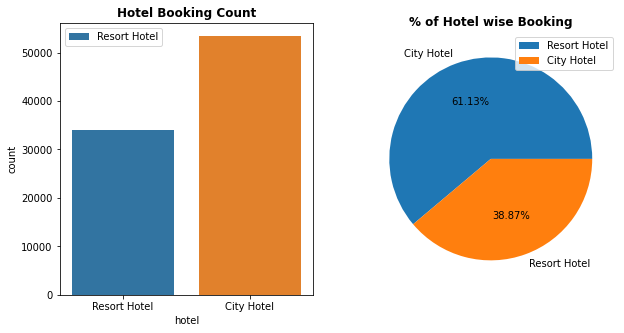

In [28]:
plt.figure(figsize = (10,5))
legend = df['hotel'].unique().tolist()
plt.subplot(121)                                              # Using subpolot to draw more than 1 graph and so that it doesnt overlap with each other
plt.title('Hotel Booking Count', fontweight = 'bold')
sns.countplot(x = df['hotel'])                                # Drawing a graph using Seaborn library
plt.legend(legend)

plt.subplot(122)
plt.title('% of Hotel wise Booking', fontweight = 'bold')
df['hotel'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.ylabel(' ')
plt.legend(legend)
plt.show()

Approx 60% bookings are for City hotel and 40% bookings are for Resort hotel.

Q.2 ) What is the frequency of tourists in an year? 

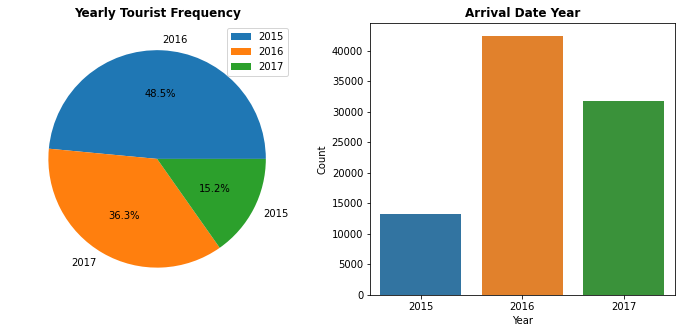

In [29]:
plt.figure(figsize = (12,5))

plt.subplot(121)
plt.title('Yearly Tourist Frequency', fontweight = 'bold')
legend = df['arrival_date_year'].unique().tolist()
df['arrival_date_year'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.legend(legend)
plt.ylabel(' ')

plt.subplot(122)
plt.title('Arrival Date Year', fontweight = 'bold')
sns.countplot(x = df['arrival_date_year'])
plt.xlabel('Year')                                                                # Naming x-axis
plt.ylabel('Count')                                                               # Naming y-axis
plt.show()

Approx 15% bookings are in 2015, 49% bookings are in 2016 and around 36% bookings are in 2017.

Q.3 ) Which is the most favourable month to visit?

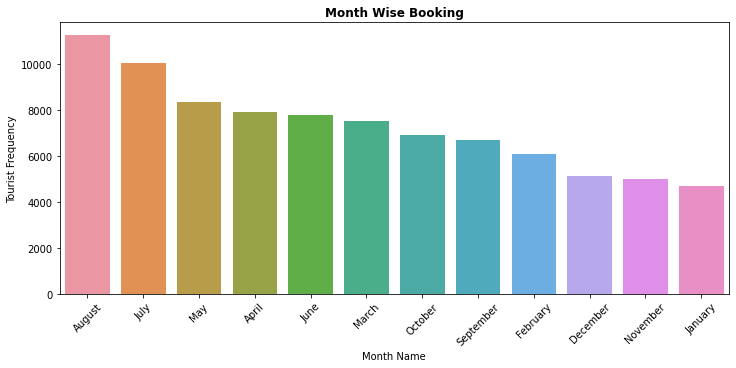

In [30]:
plt.figure(figsize =(12,5))
plt.title('Month Wise Booking', fontweight = 'bold')
sns.countplot(x = df['arrival_date_month'], order = df['arrival_date_month'].value_counts().index)
plt.xticks(rotation = "45")                                                                         # Rotating the the graph values on x-axis 
plt.xlabel('Month Name')
plt.ylabel('Tourist Frequency')
plt.show()

Q.4 )  Which meal has more demand than others?

In [31]:
df['meal']=df['meal'].apply(lambda x:'others' if x=='Undefined' else x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


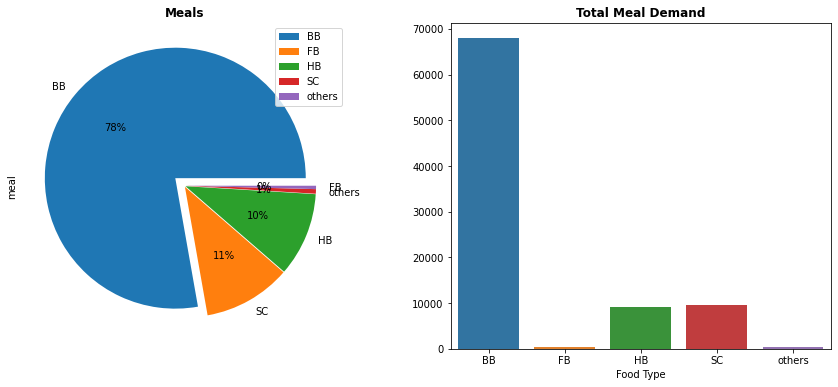

In [32]:
plt.figure(figsize = (15,6))
legend = df['meal'].unique().tolist()
plt.subplot(121)
explode = [0.09,0.01,0.01,0.01,0.01]
plt.title('Meals', fontweight = 'bold')
df['meal'].value_counts().plot(kind = 'pie', explode = explode, autopct = '%1.0f%%')
plt.legend(legend)

plt.subplot(122)
plt.title('Total Meal Demand', fontweight = 'bold')
sns.countplot(df['meal'])
plt.xlabel('Food Type')
plt.ylabel(' ')
plt.show()

Q.5 ) From where the most guests are coming ?

In [33]:
x = df['country'].value_counts()>1000
country_name = x[x].keys().tolist()
df['updated_country'] = df['country'].apply(lambda x:x if x in country_name else 'others')

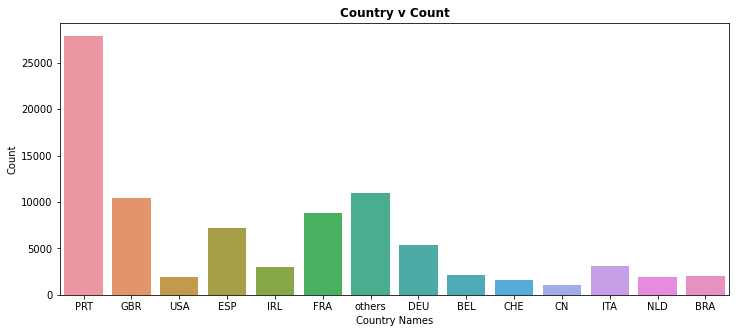

In [34]:
plt.figure(figsize =(12,5))
plt.title('Country v Count', fontweight = 'bold')
sns.countplot(x = df['updated_country'])
plt.xlabel('Country Names')
plt.ylabel('Count')
plt.show()

Q.6 ) Which market segment has most bookings?

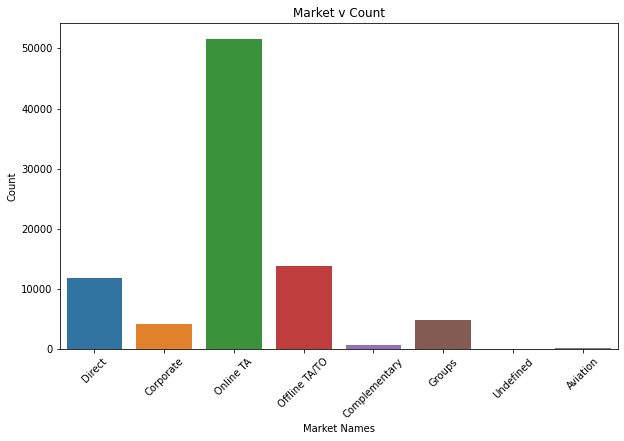

In [35]:
plt.figure(figsize =(10,6))
plt.title('Market v Count')
sns.countplot(x = df['market_segment'])
plt.xlabel('Market Names')
plt.ylabel('Count')
plt.xticks(rotation = "45")
plt.show()

Q.7 ) Which booking channel is most used for bookings?

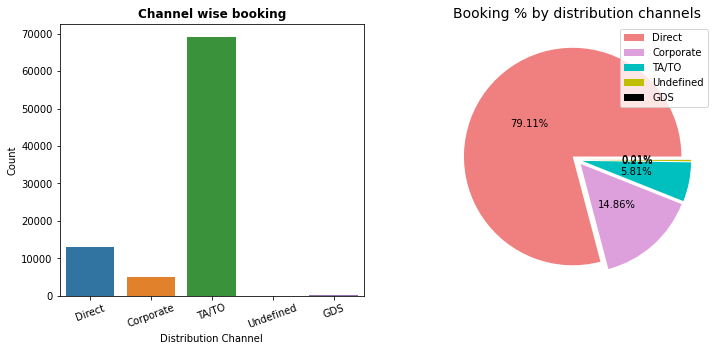

In [36]:
plt.figure(figsize=(12,5))
labels=['Direct','Corporate','TA/TO','Undefined','GDS']

plt.subplot(121)
plt.title('Channel wise booking',fontweight='bold')
sns.countplot(x=df['distribution_channel'])
plt.xlabel('Distribution Channel')
plt.xticks(rotation='20')
plt.ylabel('Count')

plt.subplot(122)
plt.title("Booking % by distribution channels", fontsize=14)
plt.pie(df['distribution_channel'].value_counts(),autopct='%1.2f%%',explode=[0.05]*5, pctdistance=0.5,colors=['lightcoral','plum','c','y','k'])
plt.legend(labels)
plt.show()

Q.8 ) Which Customer type has most frequent values?

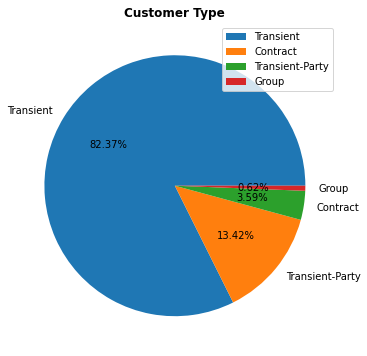

In [37]:
plt.figure(figsize = (6,6))
plt.title('Customer Type',fontweight='bold')
legend=df['customer_type'].unique().tolist()
df['customer_type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.legend(legend)
plt.ylabel('')
plt.show()

## BiVariate Analysis

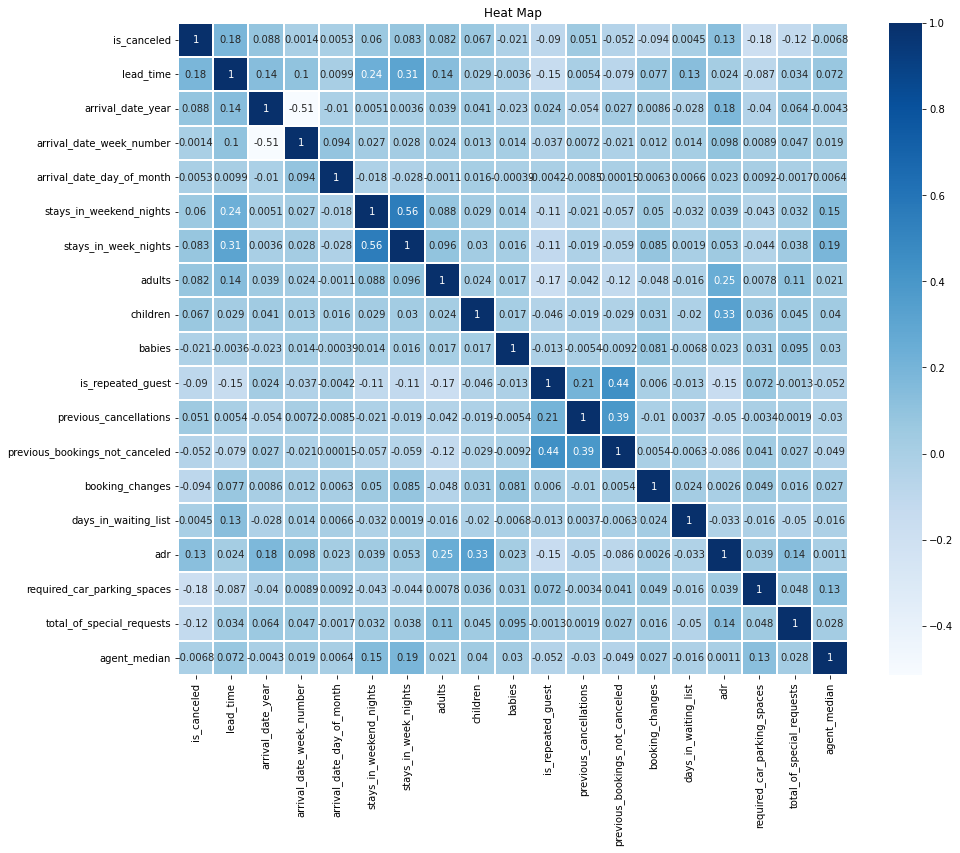

In [38]:
#correlation matrix
plt.figure(figsize = (15,12))
plt.title('Heat Map')
sns.heatmap(df.corr(),annot = True, linewidth = 1, cmap="Blues")
plt.show()

Let us try to understand what causes the people to cancel the booking.

Q.1 ) Which Hotel type has more cancellation ?

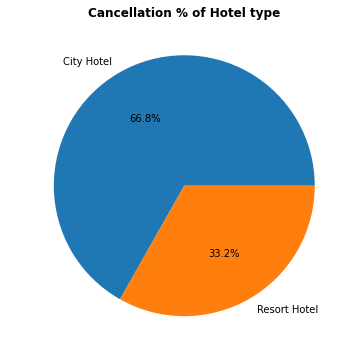

In [39]:
plt.figure(figsize = (6,6))
plt.title("Cancellation % of Hotel type", fontweight = "bold")
legend = df['hotel'].unique().tolist()
df.groupby('hotel').sum()['is_canceled'].plot(kind = "pie",autopct = "%.1f%%")  #to see the number of cancelltion of booking 
plt.ylabel(' ')
plt.show()

Q.2 ) Which significant distribution channel has highest cancellation percentage?

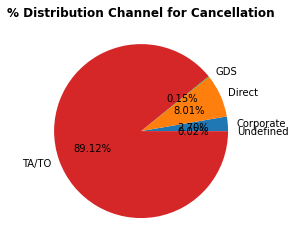

In [40]:
plt.title('% Distribution Channel for Cancellation', fontweight = 'bold')
df.groupby('distribution_channel').sum()['is_canceled'].plot(kind = 'pie', autopct = '%1.2f%%')
plt.ylabel(' ')
plt.show()

TA/TO has highest booking cancellation %.

---




Let us see what causes the cancelation of bookings of rooms by customers.

Q.3 ) What is the effect of waiting time and Lead Time on Cancelation?

In [41]:
waiting_time = df[df['days_in_waiting_list']!=0]

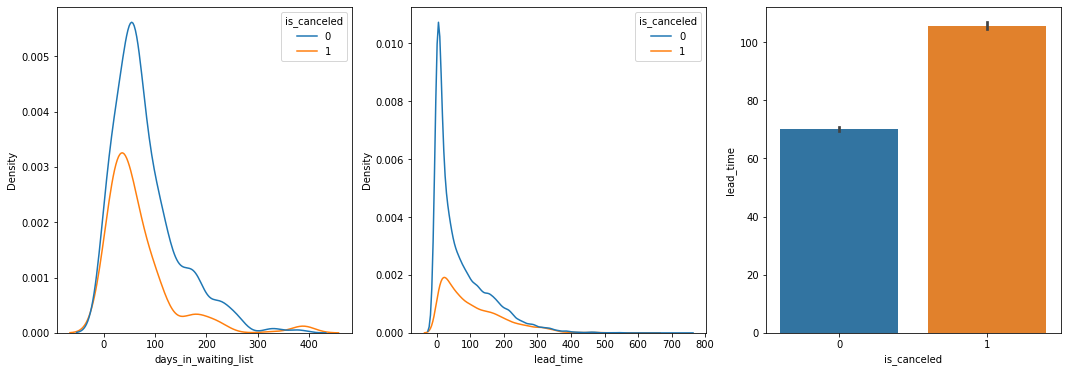

In [42]:
fig, axes = plt.subplots(1,3, figsize = (18,6))
sns.kdeplot(ax = axes[0], x = 'days_in_waiting_list', hue = 'is_canceled', data = waiting_time)
sns.kdeplot(ax = axes[1], x = 'lead_time', hue = 'is_canceled', data = df)
sns.barplot(ax=axes[2],x='is_canceled',y='lead_time',data=df)
plt.show()

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings. Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cancelation are similar for lead time too.

Q.4 ) What is the effect of the family size on cancellation?

In [43]:
df['family'] = df['adults']+df['babies']+df['children']
df1 = df.drop(['adults','babies','children'],axis=1)

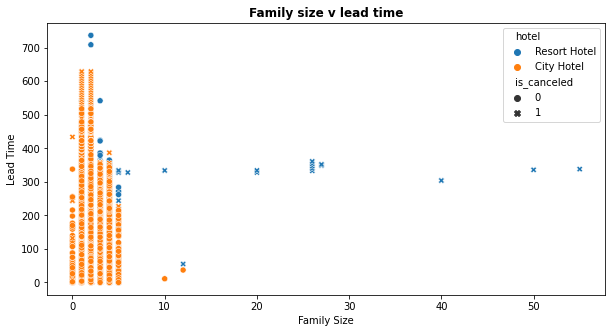

In [44]:
plt.figure(figsize = (10,5))
plt.title('Family size v lead time', fontweight = 'bold')
sns.scatterplot(x= 'family', y= 'lead_time', data = df1, hue = 'hotel',  style = 'is_canceled') # after adding 3 & 4 variable it ecame multi-variate
plt.xlabel('Family Size')
plt.ylabel('Lead Time')
plt.show()

In [45]:
df2 = df1.drop(['country'],axis=1)

Q.5 ) What is the effect of meal on cancellation?

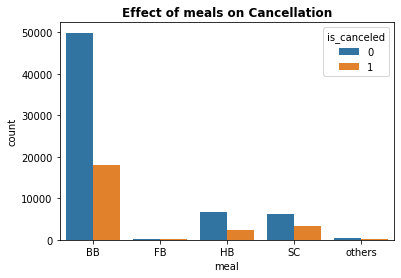

In [46]:
plt.title('Effect of meals on Cancellation',fontweight='bold')
sns.countplot(x=df1['meal'],hue=df1['is_canceled'])
plt.show()

from above graph we can see, there are no such effect of meal on Hotel_cancellation

Q.6 ) What is the effect of parking space on hotel cancellation?


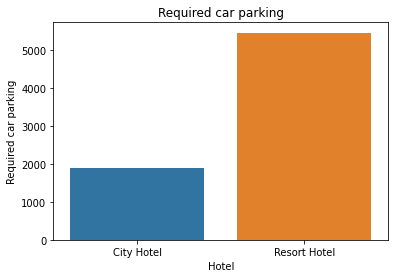

In [47]:
plt.title('Required car parking')
parking = df2.groupby('hotel').sum()['required_car_parking_spaces'].reset_index()
sns.barplot(x ='hotel', y = 'required_car_parking_spaces', data = parking)
plt.ylabel('Required car parking')
plt.xlabel('Hotel')
plt.show()

Q.7 ) Which room type is in most demand and which room type generates highest adr?


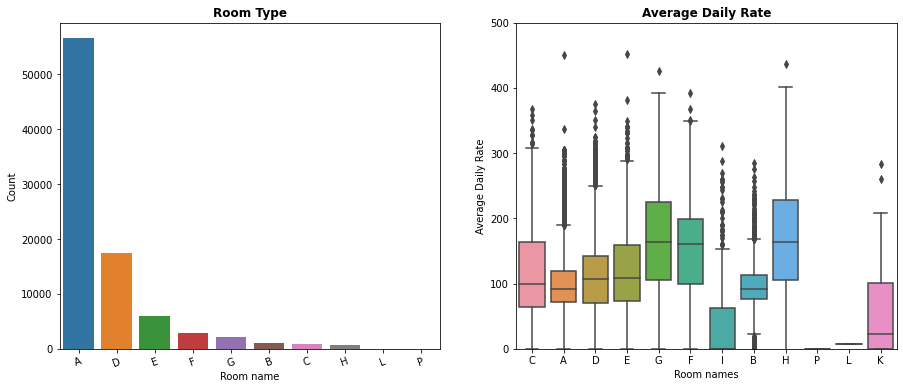

In [48]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.title('Room Type',fontweight='bold')
sns.countplot(x=df['reserved_room_type'],order=df['reserved_room_type'].value_counts().index)
plt.xlabel('Room name')
plt.xticks(rotation='20')
plt.ylabel('Count')

plt.subplot(122)
plt.title('Average Daily Rate',fontweight='bold')
sns.boxplot(x='assigned_room_type',y='adr',data=df2)
plt.xlabel('Room names')
plt.ylabel('Average Daily Rate')
plt.ylim(0,500)
plt.show()

Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

Q.8 ) Which hotel has maximum special request according to different individual group?

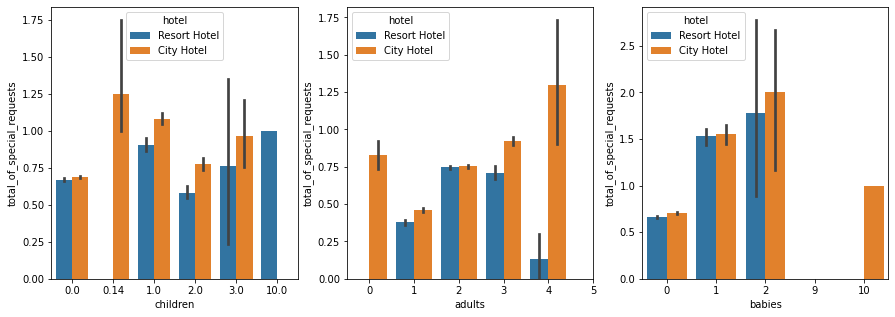

In [49]:
plt.figure(figsize = (15,5))

plt.subplot(131)                                                                              # Special request accoring to number Children.
sns.barplot(x = 'children', y = 'total_of_special_requests', data = df, hue = 'hotel')

plt.subplot(132)                                                                              # Special request accoring to number of adults.
sns.barplot(x = 'adults', y = 'total_of_special_requests', data = df, hue = 'hotel')
plt.xlim(-0.5,5)

plt.subplot(133)                                                                              # Special request accoring to number of babies.
sns.barplot(x = 'babies', y = 'total_of_special_requests', data = df, hue = 'hotel')

plt.show()

Q.9 ) Which month has maximum cancellation?

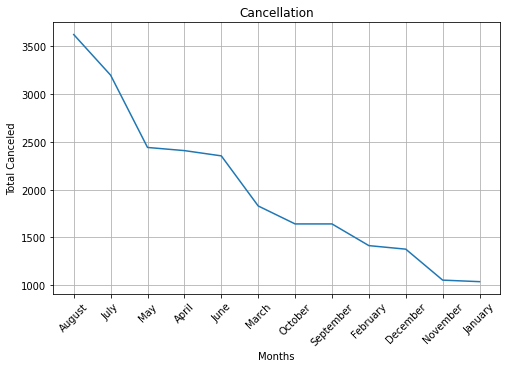

In [50]:
plt.figure(figsize = (8,5))
plt.title('Cancellation')
month_canceled = df2.groupby('arrival_date_month').sum()['is_canceled'].reset_index().sort_values('is_canceled',ascending = False)
sns.lineplot(x = 'arrival_date_month', y = 'is_canceled', data = month_canceled)
plt.grid()
plt.xlabel('Months')
plt.ylabel('Total Canceled')
plt.xticks(rotation = '45')
plt.show()

From above graph it is clear that maximum no of cancellation occurs in August followed by july and others.